# Applied Computational Statistics (ACS)

## HW2

Submit your answers by <b>LT</b>.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from itertools import permutations # You can use this for Q8

plt.rcParams['figure.figsize'] = [10, 7.5]

np.set_printoptions(precision=6)
pd.set_option('display.precision', 6)

atol = 1e-06
rtol = 1e-05

---

## Modern Portfolio Theory

Suppose that you've been hired by BDO Private Bank to manage the investment portfolio of a particular client.

The client has expressed their desire to create a trust fund for a young beneficiary. Specifically, they want the portfolio to be focused on <b>long-term growth</b> with a <b>moderate-to-cautious risk appetite</b>. 

<i>Note: This is not a formal/technical statement, there is some degree of subjectivity in your interpretation.</i>

Taking all of the client's needs into account, the senior financial advisor assigned to this account (i.e. your boss) has told you to limit your attention to a portfolio that consists of three blue-chip stocks: Ayala Corporation (AC), Meralco (MER), and SM Investments Corporation (SM). 

Additionally, he says to perform the analysis on a dataset of stock prices from January 1, 2010 to December 31, 2019.

A <b>portfolio</b> is simply a collection of financial assets such as stocks, bonds, commodities, cash, etc. 

Your ultimate goal is to create a portfolio that <u>maximizes expected return while minimizing risk</u>.

#### Q1.

Load the `ph_stocks.csv` file using pandas and print the first five entries of the dataset. 

Make sure to set the `Date` column as the index (otherwise you may get errors/warnings when calculating some of the statistics later).

You may notice that there are no stock prices for certain days. Why do you think this is?

Answer in two to three sentences ONLY.

In [38]:
df_stocks = pd.read_csv('ph_stocks.csv').set_index('Date')
print(df_stocks.head(5))

                 AC      MER       SM
Date                                 
01/04/2010  250.000  195.977  173.333
01/05/2010  250.000  201.856  173.333
01/06/2010  250.000  200.876  170.667
01/07/2010  247.917  203.816  173.333
01/08/2010  247.917  199.896  172.000


**YOUR ANSWER HERE:** If there are no stock prices it may mean that the market is closed (eg holidays or weekends) or there is no trading day for that particular day due to trading halt or trading suspensions. Stock exchanges can implement circuit breakers to help manage the volatility in the stock prices - if there is increased volatility that reaches the exchanges' limits then the trading for that particular stock may be halted.

#### Q2.

Let us ignore the missing days and assume that the daily recorded closing prices are contiguous.

Plot all three stock prices on the same graph. 

Color AC as green, MER as orange, and SM as blue. 

Make sure to include a legend and appropriately label the axes.

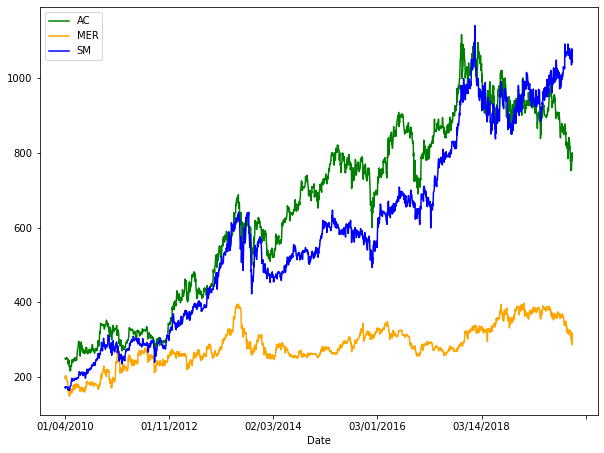

In [39]:
df_stocks.plot(style={'AC':'green', 'MER':'orange', 'SM':'blue'});

Notice that the stock prices can have different magnitudes relative to each other.

Before performing any sort of analysis, we need to transform the data so that they are in the same scale. In finance, we do this by analyzing <b><i>stock returns</b></i> rather than stock prices.

Mathematically, the return of a stock $R_t$ at time $t$ is defined as,

\begin{align*}
    R_t &= \frac{S_t - S_{t-1}}{S_{t-1}}
\end{align*}

where $S_t$ is the stock price at time $t$. 

Notice from the definition that returns can be interpreted as the <u>percentage change in the price</u>.

#### Q3.

Create a new dataframe of stock returns and print the first five entries.

In [40]:
df_returns = df_stocks.pct_change().dropna()
print(df_returns.head())

                  AC       MER        SM
Date                                    
01/05/2010  0.000000  0.029998  0.000000
01/06/2010  0.000000 -0.004855 -0.015381
01/07/2010 -0.008332  0.014636  0.015621
01/08/2010  0.000000 -0.019233 -0.007690
01/11/2010  0.008402  0.004903  0.007750


In [41]:
assert np.isclose(df_returns['AC'].iloc[4], 0.008402, atol=atol)
assert np.isclose(df_returns['MER'].iloc[4], 0.004903, atol=atol)
assert np.isclose(df_returns['SM'].iloc[4], 0.007750, atol=atol)

#### Q4.

A common assumption in mathematical finance is that the <u>returns of a particular stock are i.i.d.</u>

We will make that assumption.

Create three separate density plots (KDE plots) for the returns each stock.

Follow the same color convention as defined above.

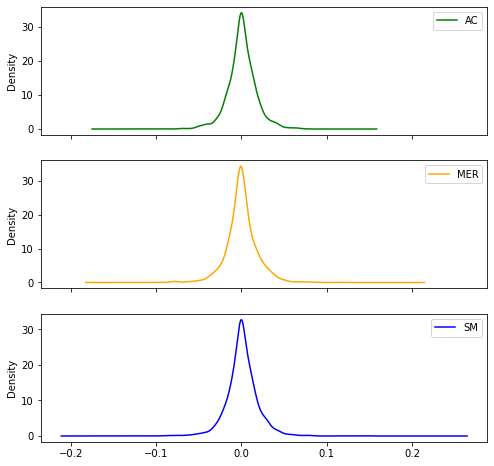

In [42]:
df_returns.plot.kde(figsize=(8,8), subplots=True, 
                    style={'AC':'green', 'MER':'orange', 'SM':'blue'});

#### Q5.

Suppose for the moment that we model the returns for each stock as independent normal distributions.

Calculate the maximum likelihood estimates $\hat{\mu}_{\text{MLE}}$ and $\hat{\sigma}_{\text{MLE}}^2$ for each stock.

In [43]:
df_mle_mean = df_returns.mean()
df_mle_variance = df_returns.var()

In [44]:
assert np.isclose(df_mle_mean['AC'], 0.000608, atol=atol)
assert np.isclose(df_mle_mean['MER'], 0.000358, atol=atol)
assert np.isclose(df_mle_mean['SM'], 0.000899, atol=atol)

assert np.isclose(df_mle_variance['AC'], 0.000276, atol=atol)
assert np.isclose(df_mle_variance['MER'], 0.000322, atol=atol)
assert np.isclose(df_mle_variance['SM'], 0.000324, atol=atol)

#### Q6.

Using the model you fit in Q5, calculate the potential one-day loss for each stock using a 95% Value-at-Risk.

In [45]:
#VaR = mean of port return - #confidence factor x stdev port return

z = norm.ppf(1-0.05)
VaR_ac = df_mle_mean['AC'] - (z * (df_mle_variance['AC'] ** 0.5))
VaR_mer = df_mle_mean['MER'] - (z * (df_mle_variance['MER'] ** 0.5))
VaR_sm = df_mle_mean['SM'] - (z * (df_mle_variance['SM'] ** 0.5))

In [46]:
# Hidden Test 1


#### Q7.

Obviously, each company does not exist in a vacuum. While each company generally moves independently of each other, macroeconomic factors and societal trends can simultaneously affect the values of companies even if they are in different industries.

Let's generalize our model of stock returns by using a multivariate normal distribution.

Calculate the maximum likelihood estimates for the mean vector $\mu$, covariance matrix $\Sigma$, and the correlation matrix.

In [48]:
returns_mean = np.array(df_returns.mean())
returns_cov = np.array(df_returns.cov())
returns_corr = np.array(df_returns.corr())

In [49]:
# Order [AC, MER, SM]
mu = np.array([0.000608, 0.000358, 0.000899])

sigma = np.array(
    [[0.000277,  0.000078,  0.000087],
     [0.000078,  0.000322,  0.000039],
     [0.000087,  0.000039,  0.000324]]) 

rho = np.array(
    [[1.000000,  0.262492,  0.291721],
     [0.262492,  1.000000,  0.119747],
     [0.291721,  0.119747,  1.000000]]) 

assert np.allclose(returns_mean, mu, atol=atol)
assert np.allclose(returns_cov, sigma, atol=atol)
assert np.allclose(returns_corr, rho, atol=atol)

---

### Interlude

At this point, we are ready to discuss the core topic of this homework.

<b>Modern Portfolio Theory</b> (MPT), also called <b>mean-variance portfolio analysis</b>, is a mathematical framework used for creating a portfolio of assets such that we maximize the portfolio's expected return for a fixed level of risk. The theory was originally developed by economist Harry Markowitz in the 1950s, for which he eventually won the Nobel Prize in Economics. You can read more about MPT [`here`](https://en.wikipedia.org/wiki/Modern_portfolio_theory).

For a three asset portfolio, its expected return and variance are defined as

\begin{align*}
    E[R_p] &= w_1 E[R_1]+ w_2 E[R_2] + w_3 E[R_3]
\end{align*}

and

\begin{align*}
    \text{Var}(R_p)  &= w_1^2 \text{Var}(R_1) + w_2^2 \text{Var}(R_2) + w_3^2 \text{Var}(R_3) + 2 w_1 w_2 \text{Cov}(R_1, R_2) + 2 w_1 w_3 \text{Cov}(R_1, R_3) + 2 w_2 w_3 \text{Cov}(R_2, R_3)
\end{align*}

where each $w_i$ corresponds to the weight of a stock such that $\sum w_i = 1$ and $R_i$ refers to the return of a stock.

In the context of MPT, <b>risk</b> is defined to be the variance or standard deviation of your portfolio returns.

The formulas above are derived from the properties of the sums of expectations and the sums of variances.

---

#### Q8.

Using the formulas defined above and your parameter estimates in Q8:

1. Create a graph where the y-axis is defined to be a portfolio's expected return and the x-axis is its standard deviation.

2. For every possible combination of $w_1$, $w_2$, and $w_3$ in increments of $0.1$, calculate the expected return and standard deviation of the portfolio and plot the point on the graph.

For illustration, you should be able to fill up the table:

| $w_1$ | $w_2$ | $w_3$ | E(R) | Std(R) |
|-------|-------|-------|-------|-------|
| 1.0  | 0.0  | 0.0  | ? | ? |
| 0.9  | 0.1  | 0.0  | ? | ? |
| 0.8  | 0.2  | 0.0  | ? | ? |
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
| 0.0  | 1.0  | 0.0  | ? | ? |
| 0.0  | 0.9  | 0.1  | ? | ? |
| 0.0  | 0.8  | 0.2  | ? | ? |
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
| 0.0  | 0.0  | 1.0  | ? | ? |
| 0.1  | 0.0  | 0.9  | ? | ? |
| 0.2  | 0.0  | 0.8  | ? | ? |
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|

and then plot the points $(x,y) = (\text{Std}(R_p), E[R_p])$ on the graph.

In [50]:
# filter for valid weights
weights = [[x/10, y/10, (10-x-y)/10] for x in range(0, 11) 
           for y in range(0, 11)]

valid_weights = []
for weight in weights:
    if sum(weight) == 1 and min(weight) >= 0:
        valid_weights.append(weight)        
all_weights = [list(set(permutations(weight))) 
               for weight in valid_weights]

# create dataframe that generates permutations of different weights
df_portfolio = pd.DataFrame(columns=['w1', 'w2', 'w3'])

for weight in all_weights:
    for item in weight:
        df_portfolio = df_portfolio.append({'w1': item[0], 
                                            'w2': item[1], 
                                            'w3': item[2]}, 
                                           ignore_index=True)
# drop duplicates
df_portfolio = df_portfolio.drop_duplicates(keep='first')

# calculate for expected value
df_portfolio['E(R)'] = (df_portfolio['w1'] * df_mle_mean['AC'] + 
                        df_portfolio['w2'] * df_mle_mean['MER'] +
                        df_portfolio['w3'] * df_mle_mean['SM'])

# calculate for standard deviation
df_portfolio['Std(R)'] = (df_portfolio['w1'] ** 2 * df_mle_variance['AC'] + 
                        df_portfolio['w2'] ** 2 * df_mle_variance['MER'] +
                        df_portfolio['w3'] ** 2 * df_mle_variance['SM'] +
                        2 * df_portfolio['w1'] * df_portfolio['w2'] * df_returns['AC'].cov(df_returns['MER']) +
                        2 * df_portfolio['w1'] * df_portfolio['w3'] * df_returns['AC'].cov(df_returns['SM']) +
                        2 * df_portfolio['w2'] * df_portfolio['w3'] * df_returns['MER'].cov(df_returns['SM'])) ** 0.5

# display output: sort values by expected return
df_portfolio.sort_values(by='E(R)', ascending=False)

,w1,w2,w3,E(R),Std(R)
1,0.0,0.0,1.0,0.000899,0.018003
8,0.1,0.0,0.9,0.000870,0.016763
3,0.0,0.1,0.9,0.000845,0.016514
13,0.2,0.0,0.8,0.000841,0.015698
63,0.1,0.1,0.8,0.000816,0.015334
...,...,...,...,...,...
19,0.3,0.7,0.0,0.000433,0.014678
4,0.0,0.9,0.1,0.000412,0.016457
12,0.2,0.8,0.0,0.000408,0.015558
7,0.1,0.9,0.0,0.000383,0.016658


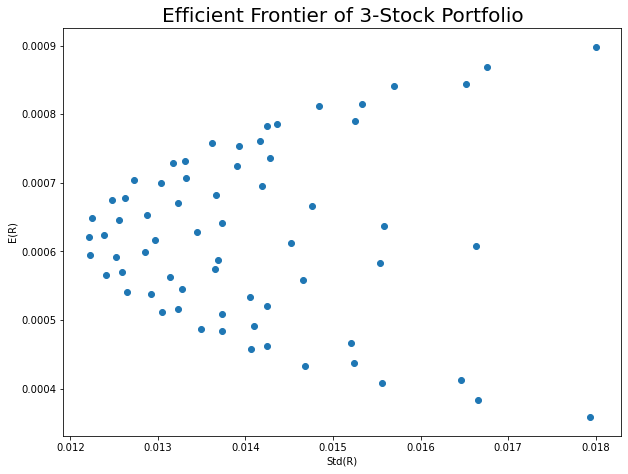

In [51]:
plt.scatter(df_portfolio['Std(R)'], df_portfolio['E(R)'])
plt.title('Efficient Frontier of 3-Stock Portfolio', fontsize = 20)
plt.xlabel('Std(R)')
plt.ylabel('E(R)')
plt.show();

In [58]:
min_var_p = df_portfolio[df_portfolio['Std(R)']==df_portfolio['Std(R)'].min()]
print('Minimum variance portfolio and weights:', '\n', min_var_p, '\n')

max_mean_p = df_portfolio[df_portfolio['E(R)']==df_portfolio['E(R)'].max()]
print('Max mean portfolio and weights:', '\n', max_mean_p, '\n')

rfr=0.0
df_portfolio['sharpe_ratio'] = ((df_portfolio['E(R)'] - rfr) / df_portfolio['Std(R)'])
max_sharpe_ratio = df_portfolio[df_portfolio['sharpe_ratio'] == df_portfolio['sharpe_ratio'].max()]
print('Best reward-to-risk ratio and weights (assuming a '
      'risk free rate of = 0.00):', '\n', max_sharpe_ratio, '\n')

#plot the lowest mean, highest risk portfolio
min_mean = df_portfolio[df_portfolio['E(R)'] == df_portfolio['E(R)'].min()]
print('Portfolio with lowest mean):', '\n', min_mean)

Minimum variance portfolio and weights: 
       w1   w2   w3     E(R)   Std(R)  sharpe_ratio
170  0.4  0.3  0.3  0.00062  0.01221       0.05081 

Max mean portfolio and weights: 
     w1   w2   w3      E(R)    Std(R)  sharpe_ratio
1  0.0  0.0  1.0  0.000899  0.018003      0.049922 

Best reward-to-risk ratio and weights (assuming a risk free rate of = 0.00): 
      w1   w2   w3      E(R)    Std(R)  sharpe_ratio
77  0.3  0.1  0.6  0.000758  0.013622      0.055612 

Portfolio with lowest mean): 
     w1   w2   w3      E(R)    Std(R)  sharpe_ratio
2  0.0  1.0  0.0  0.000358  0.017938      0.019965


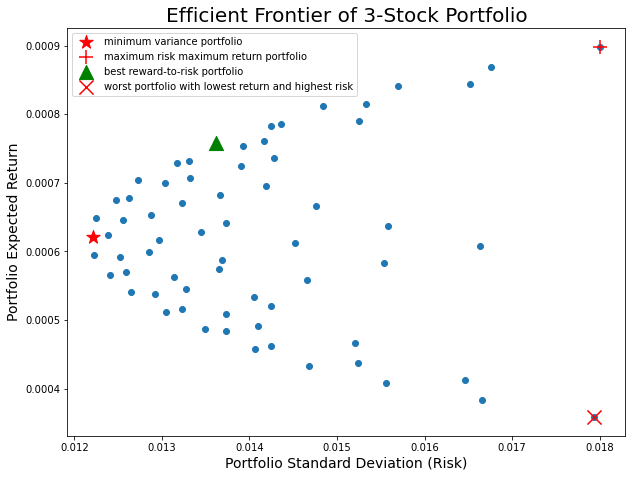

In [64]:
#plot the efficient frontier
plt.scatter(df_portfolio['Std(R)'], df_portfolio['E(R)'])
plt.title('Efficient Frontier of 3-Stock Portfolio', fontsize = 20)
plt.ylabel('Portfolio Expected Return', fontsize = 14)
plt.xlabel('Portfolio Standard Deviation (Risk)', fontsize = 14)
plt.tight_layout;

#plot the minimum variance portfolio
mvp = plt.scatter(x=min_var_p.iloc[0, 4], y=min_var_p.iloc[0, 3], color='red', 
            marker='*',s=200)

#plot the optimal risky portfolio (highest Sharpe Ratio, assuming rfr=0)
opt = plt.scatter(x=max_sharpe_ratio.iloc[0, 4], y=max_sharpe_ratio.iloc[0, 3], 
            color='green', marker='^',s=200)

#plot the highest mean, highest risk portfolio
max_mean = plt.scatter(x=max_mean_p.iloc[0, 4], y=max_mean_p.iloc[0, 3], 
            color='red', marker='+',s=200)
plt.tight_layout;

#plot the lowest mean, highest risk portfolio
low = plt.scatter(x=min_mean.iloc[0, 4], y=min_mean.iloc[0, 3], 
            color='red', marker='x',s=200)
plt.tight_layout;

plt.legend((mvp, max_mean, opt, low),
           ('minimum variance portfolio', 
            'maximum risk maximum return portfolio', 
            'best reward-to-risk portfolio','worst portfolio with ' 
            'lowest return and highest risk'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)

# plt.tight_layout;

#### Q9.

Hopefully you can spot a particular shape forming in the plot you generated in Q8.

Note that each point on your plot represents a different portfolio. In fact, if you were a rational investor, you would <u>strictly prefer</u> some of these portfolios. 

Assuming that you are in fact rational, which portfolio weights are strictly better? which ones are strictly worse?

Answer in two to five sentences ONLY. 

<i>Note: You may add annotations to the graph above to illustrate your point, if you want.</i>

**ANSWER**: A rational investor will choose a portfolio that will give him the **highest expected return for the lowest acceptable risk** so the most efficient portfolios are the dots at the top edge of the efficient frontier (connecting a line from the red * to the red +, which is the edge of the parabola). For a risk-averse individual, the most efficient portfolio is the `minimum variance portolio represented by the red star (AC wt: 40%, MER wt: 30%, SM wt: 30%)` which gives the highest possible expected return for the lowest risk. For an individual who is okay to have `high level of risk for the highest possible return, the portfolio allocation is 100% in SM` because SM has the highest mean return. The portfolio that is `strictly worse is the portfolio represented by the red X has the highest risk but the lowest expected return (100% in MER) `. The lines being traced by the lower edge of the parabola are also worse because you are not being compensated by additional return for taking on additional risk.

#### Q10.

Based on your analysis thus far, select <u>your</u> choice of "best" portfolio.

Suppose the client has allocated Php 1,000,000.00 (One Million Pesos) for the investment fund and you have bought shares of AC, MER, and SM on their behalf at December 27, 2019 closing.

Answer the following questions:

1. State your initial allocation. How would you justify your portfolio selection to your client? 

3. How much would the portfolio be worth if you liquidated it as of July 21, 2021 closing?

4. As fund manager, you are entitled to 1% of the profits as of liquidation. How much have you just made (or lost)?

**ANSWERS:**

***Notes:*** Thee closing prices of AC, MER and SM from Bloomberg.

**Initial Portfolio Allocation**
    The initial portfolio allocation is represented by the triangle in the graph, which is the portfolio that has the highest reward-to-risk ratio. This allocation is `AC: 30%, MER: 10% and SM: 60%` 

**How much will the portfolio be worth if i liquidate it as of July 21, 2021?** There is a `total loss of about 8.7371%` so the portfolio will be worth `Php 912,628.96` . 

**How much have we made/lost if we are entitled to 1% of the profits** We will be sharing 1% of the total loss of `Php 87,371`, and our share in the loss is `Php 873.71`.


In [31]:
#support for no 2 and 3 re loss

fund = 1000000
ac_close = 754
mer_close = 266
sm_close = 940

start_px = np.array(df_stocks.iloc[-1])
close_px = np.array([ac_close, mer_close, sm_close])
px_change = np.array(close_px - start_px)
px_pct_change = np.array(px_change/start_px)
myport_wt = np.array(max_sharpe_ratio.iloc[:,0:3])
total_loss_pct = (myport_wt*px_pct_change).sum()
share_loss = total_loss_pct*0.01
print('total loss: ',total_loss_pct, '\n',
      'total loss in pesos: ',total_loss_pct*fund, '\n',
      'portfolio value as of July 2021: ', fund*(1+total_loss_pct),'\n'
     'share in loss in pesos: ', share_loss*fund)

total loss:  -0.08737103910184077 
 total loss in pesos:  -87371.03910184077 
 portfolio value as of July 2021:  912628.9608981593 
share in loss in pesos:  -873.7103910184078
